In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from PIL import Image

In [2]:
raw_data=pd.read_pickle('HW3.pkl')
raw_data

,Lenna,Misaka,Dog,Hashimoto,AndyLau,Apple
Original,"[[[225, 137, 125], [224, 137, 130], [225, 137,...","[[[90, 184, 237], [90, 184, 237], [90, 184, 23...","[[[132, 132, 78], [132, 132, 78], [131, 131, 7...","[[[243, 244, 249], [228, 229, 234], [230, 231,...","[[[132, 130, 115], [137, 135, 120], [139, 137,...","[[[45, 31, 30], [45, 31, 30], [45, 31, 30], [4..."


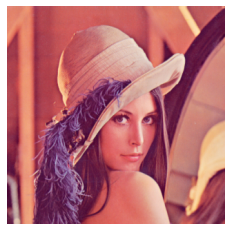

In [3]:
plt.axis('off')
img=raw_data.iloc[0][0]
plt.imshow(img)


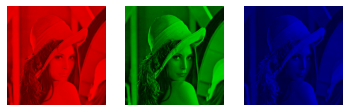

In [4]:
R=copy.deepcopy(img)
G=copy.deepcopy(img)
B=copy.deepcopy(img)
for i in range (img.shape[0]):
    for j in range (img.shape[1]):
        R[i][j][1]=R[i][j][2]=0
        G[i][j][0]=G[i][j][2]=0
        B[i][j][0]=B[i][j][1]=0
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(R)
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(G)
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(B)
#print(B.shape)

In [5]:
R_conv=np.zeros((314,314,3))
R_conv=R_conv.astype('int')
G_conv=np.zeros((314,314,3))
G_conv=G_conv.astype('int')
B_conv=np.zeros((314,314,3))
B_conv=B_conv.astype('int')

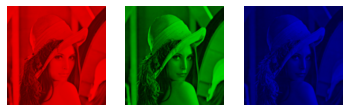

In [6]:
for i in range(1,315):
    for j in range (1,315):
        R_conv[i-1][j-1][0]=R[i][j][0]/9+R[i-1][j-1][0]/9+R[i-1][j][0]/9+R[i-1][j+1][0]/9+R[i][j-1][0]/9+R[i][j+1][0]/9+R[i+1][j][0]/9+R[i+1][j-1][0]/9+R[i+1][j+1][0]/9
        G_conv[i-1][j-1][1]=G[i][j][1]/9+G[i-1][j-1][1]/9+G[i-1][j][1]/9+G[i-1][j+1][1]/9+G[i][j-1][1]/9+G[i][j+1][1]/9+G[i+1][j][1]/9+G[i+1][j-1][1]/9+G[i+1][j+1][1]/9
        B_conv[i-1][j-1][2]=B[i][j][2]/9+B[i-1][j-1][2]/9+B[i-1][j][2]/9+B[i-1][j+1][2]/9+B[i][j-1][2]/9+B[i][j+1][2]/9+B[i+1][j][2]/9+B[i+1][j-1][2]/9+B[i+1][j+1][2]/9


plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(R_conv)
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(G_conv)
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(B_conv)

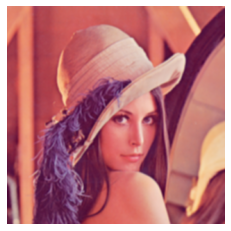

In [7]:
blur=R_conv+G_conv+B_conv
plt.axis('off')
plt.imshow(blur)

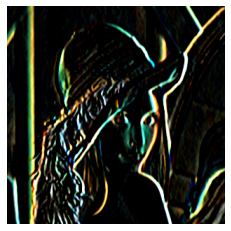

In [8]:
edge=np.zeros((311,311,3))
edge=edge.astype('int')
for i in range(1,312):
    for j in range(1,312):
        for k in range(0,3):
            edge[i-1][j-1][k]= \
            blur[i-1][j-1][k]+blur[i-1][j][k]-blur[i-1][j+1][k]-blur[i-1][j+2][k]+ \
            blur[i][j-1][k]+blur[i][j][k]-blur[i][j+1][k]-blur[i][j+2][k]+ \
            blur[i+1][j-1][k]+blur[i+1][j][k]-blur[i+1][j+1][k]-blur[i+1][j+2][k]+ \
            blur[i+2][j-1][k]+blur[i+2][j][k]-blur[i+2][j+1][k]-blur[i+2][j+2][k]
            
            if edge[i-1][j-1][k]<0 :
                edge[i-1][j-1][k]=0
            if edge[i-1][j-1][k]>255 :
                edge[i-1][j-1][k]=255
            
            
plt.axis('off')
plt.imshow(edge)
#plt.imshow((edge * 255).astype(np.uint8))
#edge